In [1]:
import pandas as pd
import numpy as np
from dataset_functions import *

In [2]:
df, target = get_dataset()
df, target = teamstats_teamheros_transform(df,target)

Features:  Index(['match_id_hash', 'game_time', 'game_mode', 'lobby_type',
       'objectives_len', 'chat_len', 'r1_hero_id', 'r1_kills', 'r1_deaths',
       'r1_assists',
       ...
       'd5_stuns', 'd5_creeps_stacked', 'd5_camps_stacked', 'd5_rune_pickups',
       'd5_firstblood_claimed', 'd5_teamfight_participation',
       'd5_towers_killed', 'd5_roshans_killed', 'd5_obs_placed',
       'd5_sen_placed'],
      dtype='object', length=246) 

Target Columns:  Index(['match_id_hash', 'game_time', 'radiant_win', 'duration',
       'time_remaining', 'next_roshan_team'],
      dtype='object') 

Filtering Df:  (game_mode == 2 or game_mode == 22) and game_time > 0 

Dropped:  ['lobby_type', 'chat_len', 'game_mode'] 

Dataframe Shape:  (32153, 243) 

Hero Id Labels: ['r1_hero_id', 'r2_hero_id', 'r3_hero_id', 'r4_hero_id', 'r5_hero_id', 'd1_hero_id', 'd2_hero_id', 'd3_hero_id', 'd4_hero_id', 'd5_hero_id'] 

Numbers of Heros:  115 



c:\Users\panal\VSCode\ML-Project\code\dataset_functions.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"d_{hero_id}"] = (
c:\Users\panal\VSCode\ML-Project\code\dataset_functions.py:164: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"r_{hero_id}"] = (
c:\Users\panal\VSCode\ML-Project\code\dataset_functions.py:171: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis

Dataframe Shape: (32153, 463) 

NaN Count:  0 

Single Hero Labels: ['r1_kills', 'r1_deaths', 'r1_assists', 'r1_denies', 'r1_gold', 'r1_lh', 'r1_xp', 'r1_health', 'r1_max_health', 'r1_max_mana', 'r1_level', 'r1_x', 'r1_y', 'r1_stuns', 'r1_creeps_stacked', 'r1_camps_stacked', 'r1_rune_pickups', 'r1_firstblood_claimed', 'r1_teamfight_participation', 'r1_towers_killed', 'r1_roshans_killed', 'r1_obs_placed', 'r1_sen_placed', 'r2_kills', 'r2_deaths', 'r2_assists', 'r2_denies', 'r2_gold', 'r2_lh', 'r2_xp', 'r2_health', 'r2_max_health', 'r2_max_mana', 'r2_level', 'r2_x', 'r2_y', 'r2_stuns', 'r2_creeps_stacked', 'r2_camps_stacked', 'r2_rune_pickups', 'r2_firstblood_claimed', 'r2_teamfight_participation', 'r2_towers_killed', 'r2_roshans_killed', 'r2_obs_placed', 'r2_sen_placed', 'r3_kills', 'r3_deaths', 'r3_assists', 'r3_denies', 'r3_gold', 'r3_lh', 'r3_xp', 'r3_health', 'r3_max_health', 'r3_max_mana', 'r3_level', 'r3_x', 'r3_y', 'r3_stuns', 'r3_creeps_stacked', 'r3_camps_stacked', 'r3_rune_pic

In [23]:
win = target["radiant_win"].astype(int)
df = drop_heros_labels(df)

Hero Id Labels: [] 

Dropped Dataframe Shape: (32153, 64)


In [24]:
from sklearn.model_selection import train_test_split

np.random.seed(seed=10)

X_train,X_test,Y_train,Y_test = train_test_split(df,win,test_size=0.2)

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100,150],
    "algorithm": ['SAMME'],
    "learning_rate": [0.5,1,1.5]
}

feature_selector = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=params)

feature_selector.fit(X_train,Y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME'], 'learning_rate': [0.5, 1, 1.5],
                         'n_estimators': [100, 150]})

In [29]:
print(feature_selector.best_params_)
feature_selector = AdaBoostClassifier(**feature_selector.best_params_)
feature_selector.fit(X_train,Y_train)

{'algorithm': 'SAMME', 'learning_rate': 1.5, 'n_estimators': 150}


AdaBoostClassifier(algorithm='SAMME', learning_rate=1.5, n_estimators=150)

In [31]:
from sklearn.metrics import roc_auc_score, accuracy_score

Y_pred = feature_selector.predict(X_test)

acc = accuracy_score(Y_test,Y_pred)
auc = roc_auc_score(Y_test,Y_pred)

print("Accouracy ",acc)
print("Auc",auc)

feature_importance = {
    name: value 
    for name,value in zip(feature_selector.feature_names_in_,feature_selector.feature_importances_)
}

print(feature_importance)

feature_importance = dict(reversed(sorted(feature_importance.items(), key=lambda item: item[1])))
print(feature_importance)
feature_names = list(feature_importance.keys())[:10]
print(list(feature_importance.keys())[-10:])
print(feature_names)
print(list(feature_importance.keys()))
""" print(feature_importance["d_58"])
print(feature_importance["d_68"])
print(feature_importance["r_32"])
print(feature_importance["d_32"]) """
print(feature_importance["r2_y"])
#print(feature_importance["d_towers_killed"])
print(feature_importance["objectives_len"])
#print(feature_importance["d_teamfight_participation"])

Accouracy  0.7064220183486238
Auc 0.7048297771350858
{'game_time': np.float64(0.0), 'objectives_len': np.float64(0.0), 'r1_x': np.float64(0.015934138873029132), 'r1_y': np.float64(0.023910058612675766), 'r2_x': np.float64(0.014832375248202773), 'r2_y': np.float64(0.01175905149352888), 'r3_x': np.float64(0.0), 'r3_y': np.float64(0.009818019005821615), 'r4_x': np.float64(0.0322138917112), 'r4_y': np.float64(0.04253214143993474), 'r5_x': np.float64(0.009656186012670442), 'r5_y': np.float64(0.0056560946828101465), 'd1_x': np.float64(0.004276153985126784), 'd1_y': np.float64(0.008365600414733604), 'd2_x': np.float64(0.01294686852224712), 'd2_y': np.float64(0.006476894405894348), 'd3_x': np.float64(0.0), 'd3_y': np.float64(0.013804081417426525), 'd4_x': np.float64(0.0), 'd4_y': np.float64(0.0), 'd5_x': np.float64(0.0), 'd5_y': np.float64(0.0), 'r_kills': np.float64(0.08289405915971834), 'r_deaths': np.float64(0.017439881910116205), 'r_assists': np.float64(0.01851476257097694), 'r_denies': np

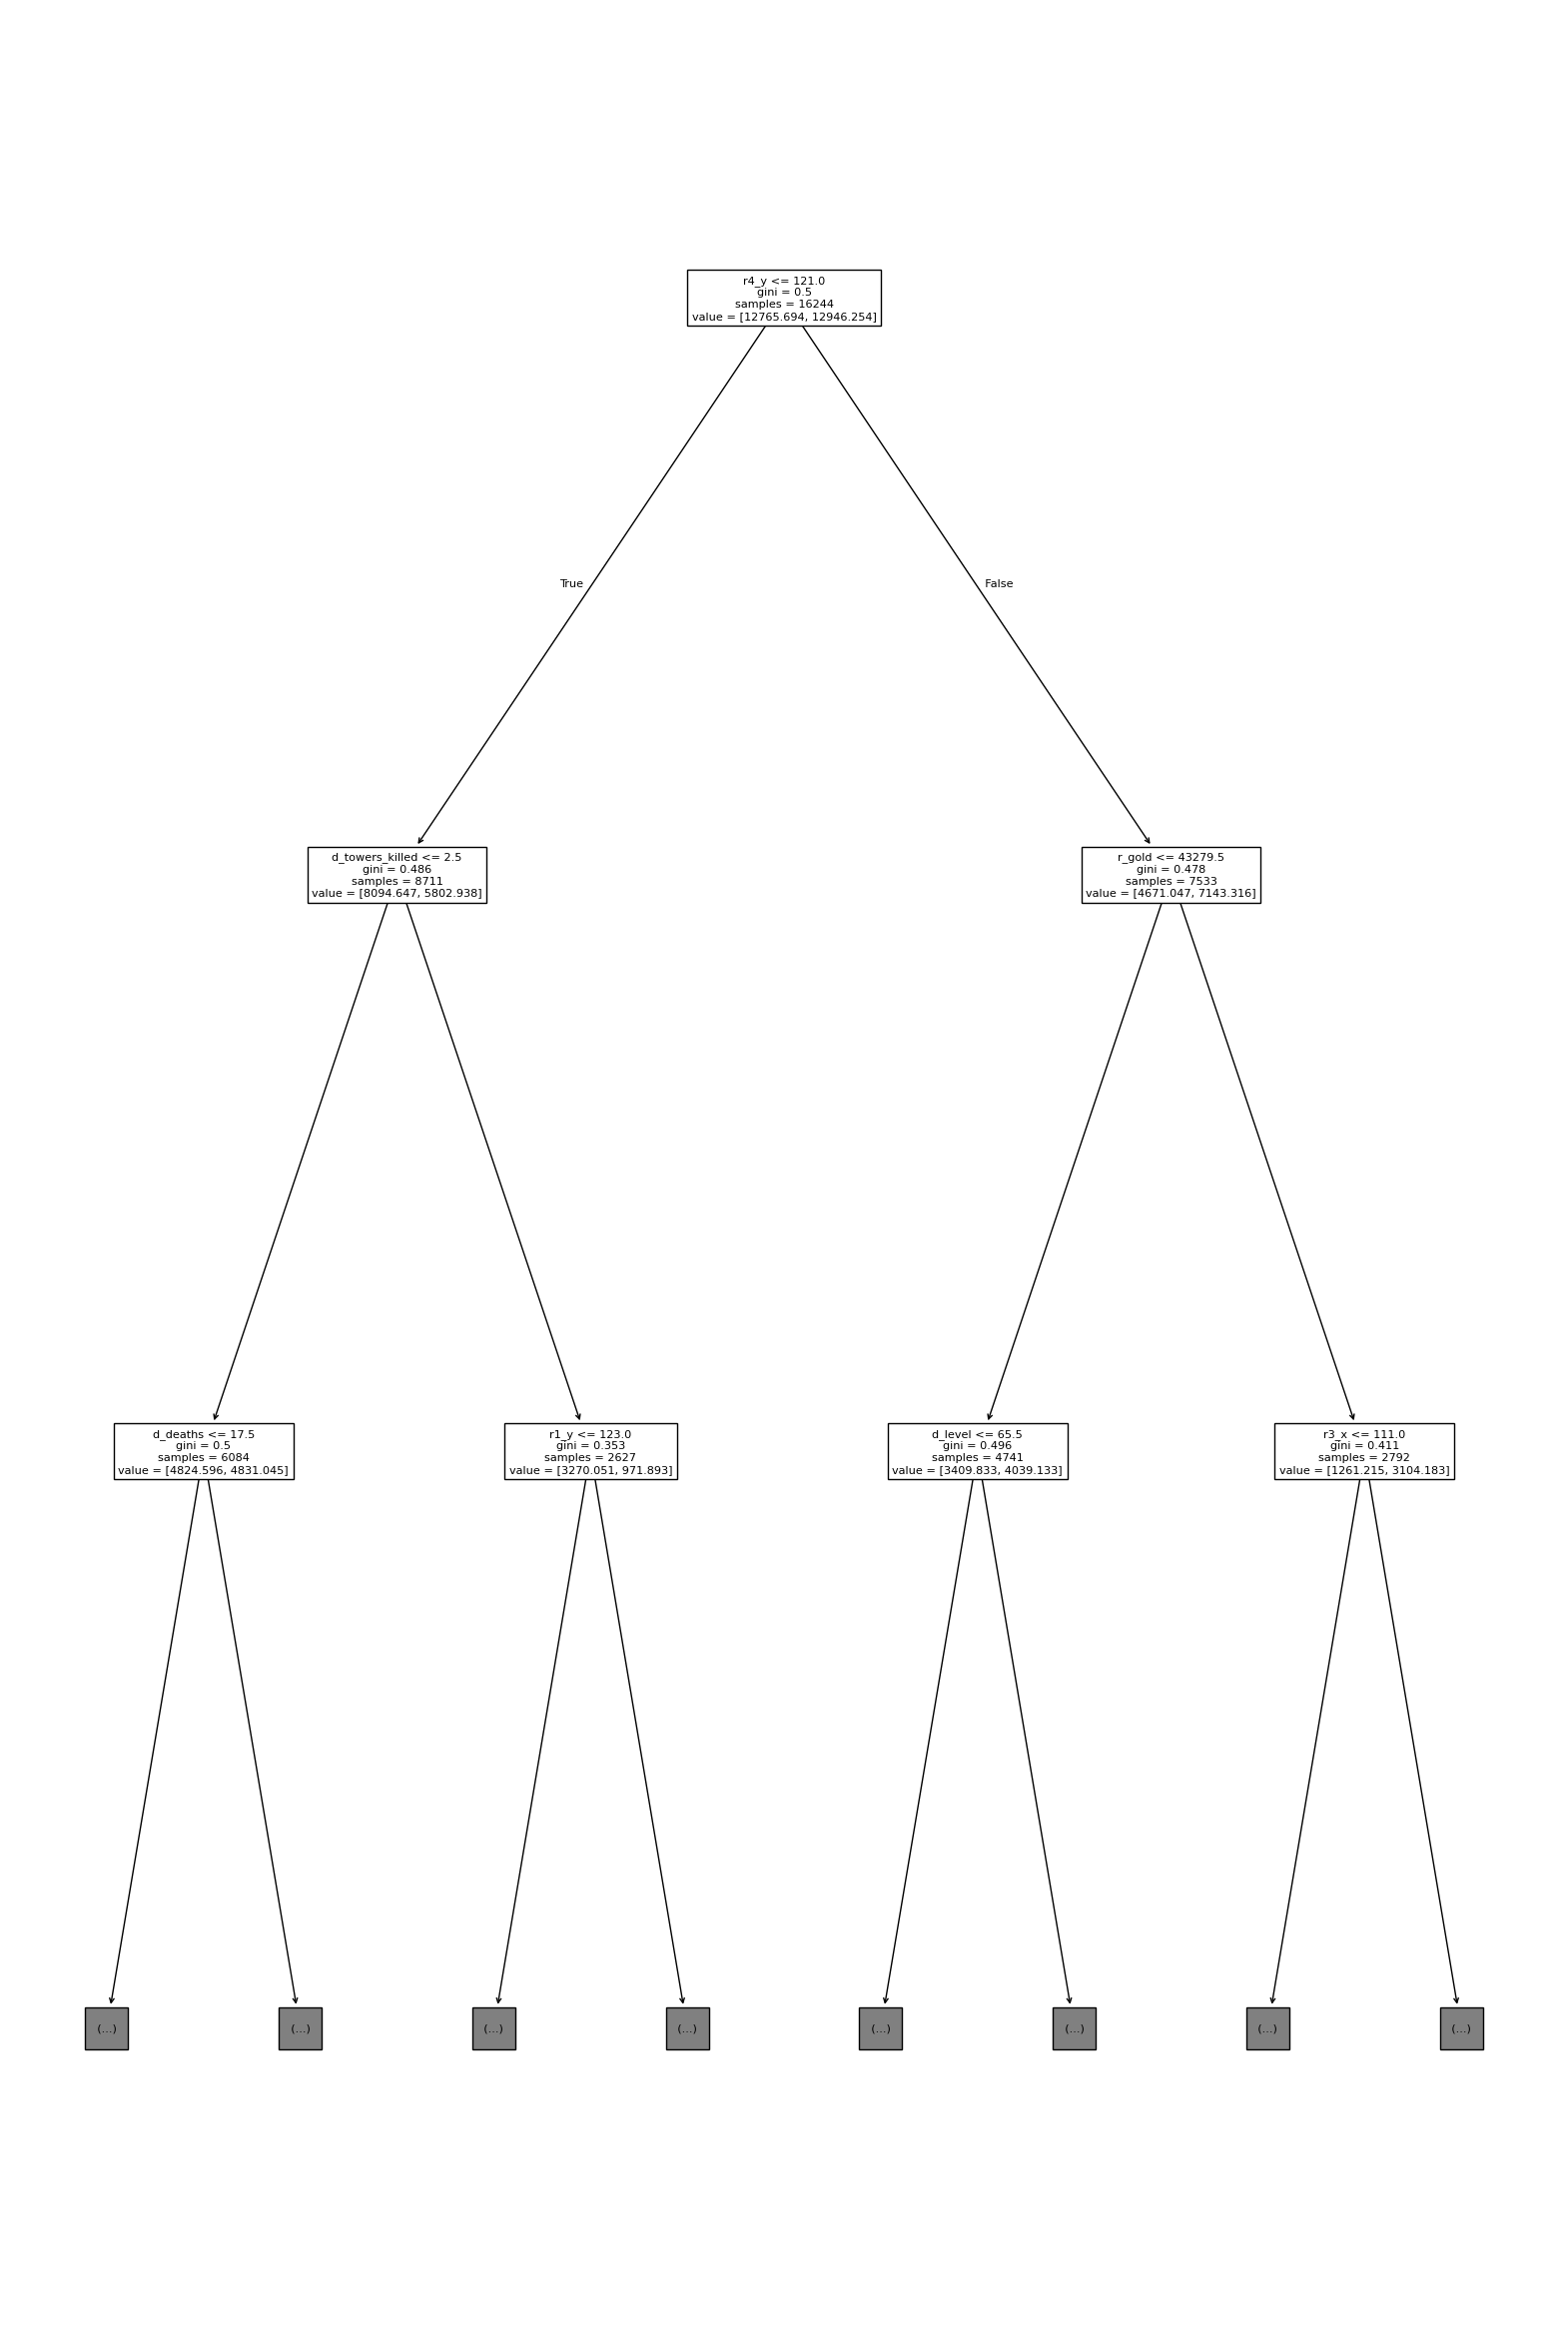

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree = feature_selector.estimators_[1]

plt.figure(figsize=(20,30))
plot_tree(tree,max_depth=2,feature_names=df.columns)
plt.show()

In [ ]:
n_components = np.arange(10,df.shape[1],5)
gammas = np.linspace(0,2,5)

acc_dict = {}
roc_dict = {}

for n in n_components:
    for gamma in gammas:
        kpca = KernelPCA(n_components=n, kernel='rbf',gamma=gamma)
        X_train_kpca = kpca.fit_transform(X_train)
        feature_selector.fit(X_train_kpca,Y_train)
        Y_pred = feature_selector.predict(kpca.transform(X_test))
        roc_dict[n][gamma] = roc_auc_score(Y_test,Y_pred)
        acc_dict[n][gamma] = accuracy_score(Y_test,Y_pred)
        print(f"n {n}, gamma {gamma}: AUC - {roc_dict[n][gamma]}, Acc - {acc_dict[n][gamma]}")

In [ ]:
print(roc_dict)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = drop_heros_labels(X_train)
X_test = drop_heros_labels(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n = 50
gamma = 0.5
kpca = KernelPCA(n_components=n, kernel='rbf',gamma=gamma)
X_train_kpca = kpca.fit_transform(X_train)
feature_selector.fit(X_train_kpca,Y_train)
Y_pred = feature_selector.predict(kpca.transform(X_test))
roc_dict[n][gamma] = roc_auc_score(Y_test,Y_pred)
acc_dict[n][gamma] = accuracy_score(Y_test,Y_pred)

Hero Id Labels: [] 

Dropped Dataframe Shape: (25722, 64)
Hero Id Labels: [] 

Dropped Dataframe Shape: (6431, 64)
